In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [2]:
from time_keeper import TimeKeeper

In [4]:
%%time
tk = TimeKeeper("Read raw data")
alldf = pd.read_csv("all_data_raw_df_v5.csv", dtype=str)
print(alldf.shape)
tk.next("Drop duplicates")
alldf.drop_duplicates(subset="id", inplace=True)
print(alldf.shape)
tk.next("Converting created_at string to datetime")
alldf["created_at"] = alldf["created_at"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f%z"))
tk.next("Sorting by datetime")
alldf.sort_values("created_at", inplace=True)
tk.done()
alldf

Read raw data...
(14060535, 17)
Read raw data done.    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... T=83.560495108 seconds
Drop duplicates...
(14060535, 17)
Drop duplicates done.  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... T=15.42547621300001 seconds
Converting created_at string to datetime...
Converting created_at string to datetime done.  ...  ...  ...  ...  ...  ... T=143.55620243700002 seconds
Sorting by datetime...
Sorting by datetime done.   ...  ...  ...  ...  ...  ...  ...  ...  ...  ... T=7.83799138400002 seconds
CPU times: user 4min, sys: 10.3 s, total: 4min 10s
Wall time: 4min 10s


,id,conversation_id,edit_history_tweet_ids,author_id,created_at,text,impression_count,like_count,quote_count,reply_count,retweet_count,quoted,replied_to,retweeted,in_reply_to_user_id,geo,mentions
1758446,1465908518532182018,1465908518532182018,['1465908518532182018'],14885540,2021-12-01 05:00:00+00:00,While it's too early to know how the omicron v...,0,3,0,0,1,[],[],[],NaN,NaN,[]
9907665,1465908518356074502,1465908518356074502,['1465908518356074502'],13719342,2021-12-01 05:00:00+00:00,"According to the Associated Press, the pop sta...",0,0,0,0,1,[],[],[],NaN,NaN,[]
8256268,1465908518804881408,1465908518804881408,['1465908518804881408'],3301782494,2021-12-01 05:00:00+00:00,RT @EileenParkTV: https://t.co/qaVghYz2Ek,0,0,0,0,3,[],[],['1465892768052486154'],NaN,NaN,[]
13239158,1465908522109992964,1465908522109992964,['1465908522109992964'],21265939,2021-12-01 05:00:01+00:00,RT @jimmytcannon: This is so fucking predatory...,0,0,0,0,10,[],[],['1465895325135253509'],NaN,NaN,['4705865785']
10022373,1465908523209011209,1465908523209011209,['1465908523209011209'],501397421,2021-12-01 05:00:01+00:00,RT @B52Malmet: Dr. Oz is not a “celebrity surg...,0,0,0,0,2112,[],[],['1465860012404723713'],NaN,NaN,['2876041031']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160612,1509757430414000132,1509757430414000132,['1509757430414000132'],199056422,2022-04-01 04:59:56+00:00,"RT @KariLake: The crowd here in Pearce, AZ is ...",0,0,0,0,359,[],[],['1509722039074009109'],NaN,NaN,['1082197856']
5697590,1509757437397458948,1509757437397458948,['1509757437397458948'],1158841136439427072,2022-04-01 04:59:57+00:00,RT @sandibachom: Reminder. They finally capped...,0,0,0,0,4472,[],[],['1509743297933291520'],NaN,NaN,['17027632']
8158987,1509757435950510080,1509757435950510080,['1509757435950510080'],3262551006,2022-04-01 04:59:57+00:00,RT @lindyli: 193 Republicans voted NO on lower...,0,0,0,0,2177,[],[],['1509727862475083781'],NaN,NaN,['270132611']
425521,1509757436462346262,1509757436462346262,['1509757436462346262'],126075164,2022-04-01 04:59:57+00:00,RT @gnauski: Australia’s first offshore wind p...,0,0,0,0,2,[],[],['1509754010567573505'],NaN,NaN,"['978241567239553024', '456230845']"


In [ ]:
%%time 
import re
from collections import defaultdict
from itertools import combinations
from tqdm import tqdm

def calculate_all_combinations_document_frequency(tweets, max_combo_size = 4):
    df = defaultdict(int)
    for tweet in tqdm(tweets, desc="Processing Tweets"):
        if type(tweet) is str:
            # Find hashtags in the tweet
            hashtags = set(re.findall(r"#(\w+)", tweet))
            # Consider all combinations of the hashtags
            for size in range(1, min(max_combo_size, len(hashtags) + 1)):
                for combo in combinations(hashtags, size):
                    # Sort the combo to avoid different orderings of the same combo
                    sorted_combo = tuple(sorted(combo))
                    df[sorted_combo] += 1
    return df

document_frequency = calculate_all_combinations_document_frequency(tdf["text"].values)
len(document_frequency)

In [5]:
rt_edges = alldf[alldf["id"] != alldf["conversation_id"]]
rt_edges

,id,conversation_id,edit_history_tweet_ids,author_id,created_at,text,impression_count,like_count,quote_count,reply_count,retweet_count,quoted,replied_to,retweeted,in_reply_to_user_id,geo,mentions
7459629,1465908563616972803,1465907278473744384,['1465908563616972803'],381866291,2021-12-01 05:00:11+00:00,@HalliebethLane LMFAOOOOO FUCK DOOK!!!,0,0,0,1,0,[],['1465908296347492353'],[],43277776,NaN,['43277776']
3924034,1465908621762387969,1465881112614510597,['1465908621762387969'],3103213542,2021-12-01 05:00:25+00:00,@washingtonpost Dead wrong,0,6,0,1,1,[],['1465881112614510597'],[],2467791,NaN,['2467791']
12477813,1465908650921234434,1465905553192931329,['1465908650921234434'],1123776239603453953,2021-12-01 05:00:32+00:00,"@mtracey Frankly, whatever happened to the Ame...",0,6,0,4,0,[],['1465905553192931329'],[],24127811,NaN,['24127811']
13484175,1465908662514466816,1465542257365430274,['1465908662514466816'],420617857,2021-12-01 05:00:35+00:00,@PSYCH0PHANTIC @DubbFTW @RicardoRoc @sarahhart...,0,0,0,1,0,[],['1465884853577162755'],[],2330984622,NaN,"['1115894235264372737', '1251229837383077892',..."
2102907,1465908678746382336,1464786050857975808,['1465908678746382336'],1027760989,2021-12-01 05:00:38+00:00,@wiwiingit_p #Whatsup #WithU #cheapcontent \n#...,0,0,0,0,0,['1465510529997357061'],['1464786050857975808'],[],2148828366,NaN,['2148828366']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154986,1509757338189803562,1509756724256944140,['1509757338189803562'],6996062,2022-04-01 04:59:34+00:00,@__Kimberly1 https://t.co/aLU1tcdReY,0,0,0,0,0,[],['1509756724256944140'],[],3028493620,NaN,['3028493620']
8052315,1509757353171857431,1509748835446403082,['1509757353171857431'],1391257563296063491,2022-04-01 04:59:37+00:00,@MatthewAMullins Jesus Christ using profanity ...,0,1,0,0,0,[],['1509748835446403082'],[],3343249534,NaN,['3343249534']
154985,1509757404300423195,1509707705090555907,['1509757404300423195'],3110461544,2022-04-01 04:59:49+00:00,@csd Besides statistics (I took many stats cla...,0,2,0,1,0,[],['1509707705090555907'],[],6529922,NaN,['6529922']
1583291,1509757405227220993,1509756002777935897,['1509757405227220993'],171213420,2022-04-01 04:59:49+00:00,@lShastorl @YallStreetLance Imagine being old ...,0,2,0,1,0,[],['1509757265921945625'],[],1184498730852147202,NaN,['1184498730852147202']


In [6]:
vol_time = rt_edges[["created_at", "in_reply_to_user_id"]].set_index("created_at").resample("1D").size().rename("Volume")
vol_time

created_at
2021-12-01 00:00:00+00:00     9261
2021-12-02 00:00:00+00:00    12800
2021-12-03 00:00:00+00:00    12504
2021-12-04 00:00:00+00:00    12720
2021-12-05 00:00:00+00:00    12262
                             ...  
2022-03-28 00:00:00+00:00    12844
2022-03-29 00:00:00+00:00    12431
2022-03-30 00:00:00+00:00    12849
2022-03-31 00:00:00+00:00    12829
2022-04-01 00:00:00+00:00     2972
Freq: D, Name: Volume, Length: 122, dtype: int64

In [25]:
voldiff = vol_time.diff()
voldiff

created_at
2021-12-01 00:00:00+00:00       NaN
2021-12-02 00:00:00+00:00    3539.0
2021-12-03 00:00:00+00:00    -296.0
2021-12-04 00:00:00+00:00     216.0
2021-12-05 00:00:00+00:00    -458.0
                              ...  
2022-03-28 00:00:00+00:00    1434.0
2022-03-29 00:00:00+00:00    -413.0
2022-03-30 00:00:00+00:00     418.0
2022-03-31 00:00:00+00:00     -20.0
2022-04-01 00:00:00+00:00   -9857.0
Freq: D, Name: Volume, Length: 122, dtype: float64

In [7]:
time_parent_count = rt_edges[["created_at", "in_reply_to_user_id"]].set_index("created_at").groupby([pd.Grouper(freq="1D"), "in_reply_to_user_id"]).size().rename("Count").reset_index()
time_parent_count

,created_at,in_reply_to_user_id,Count
0,2021-12-01 00:00:00+00:00,1000602254,1
1,2021-12-01 00:00:00+00:00,1000738880369422336,1
2,2021-12-01 00:00:00+00:00,1000771633919987713,1
3,2021-12-01 00:00:00+00:00,1000811240229351424,1
4,2021-12-01 00:00:00+00:00,1001936461,1
...,...,...,...
988945,2022-04-01 00:00:00+00:00,995778266899337216,1
988946,2022-04-01 00:00:00+00:00,996199299036909574,1
988947,2022-04-01 00:00:00+00:00,997850973266587648,1
988948,2022-04-01 00:00:00+00:00,998140573008695296,1


In [8]:
tpc = time_parent_count.pivot(index="created_at", columns="in_reply_to_user_id", values="Count").fillna(0)
tpc

in_reply_to_user_id,1000003000969162757,1000008650994446337,1000008772662644738,1000009220362731522,1000019520596082688,1000023220660195328,1000027408508977152,1000039196982218752,1000040931867885568,1000041135396433921,...,99994358,999945379,999955486001762304,999958012558225408,999958937368780801,999980776354648070,999982029302198272,999982108499210240,999986210885001217,999991396445585410
created_at,,,,,,,,,,,,,,,,,,,,,
2021-12-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-02 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-03 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-04 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-05 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-29 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-30 00:00:00+00:00,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
tpcr = tpc.rank(axis=1, method='dense', ascending=False)
tpcr

in_reply_to_user_id,1000003000969162757,1000008650994446337,1000008772662644738,1000009220362731522,1000019520596082688,1000023220660195328,1000027408508977152,1000039196982218752,1000040931867885568,1000041135396433921,...,99994358,999945379,999955486001762304,999958012558225408,999958937368780801,999980776354648070,999982029302198272,999982108499210240,999986210885001217,999991396445585410
created_at,,,,,,,,,,,,,,,,,,,,,
2021-12-01 00:00:00+00:00,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
2021-12-02 00:00:00+00:00,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
2021-12-03 00:00:00+00:00,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
2021-12-04 00:00:00+00:00,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,30.0,30.0,29.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
2021-12-05 00:00:00+00:00,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,...,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28 00:00:00+00:00,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
2022-03-29 00:00:00+00:00,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
2022-03-30 00:00:00+00:00,37.0,34.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0


In [10]:
tpcr.iloc[1].nunique(), tpcr.iloc[1].unique()

(30,
 array([30., 27., 29., 28., 26., 25., 23.,  9., 19., 22., 24., 13., 20.,
         4.,  1., 18., 21., 17., 16., 10., 14.,  5., 12., 11.,  6., 15.,
         8.,  2.,  3.,  7.]))

In [11]:
ranks = tpcr.values

In [12]:
def average_rank_change_per_step(ranks):
    num_time_steps, num_users = ranks.shape
    avg_changes = []
    for t in range(1, num_time_steps):
        abs_changes = np.abs(ranks[t] - ranks[t-1])
        avg_change = np.mean(abs_changes)
        avg_changes.append(avg_change)
    return avg_changes


def rmsd_rank_change_per_step(ranks):
    num_time_steps, num_users = ranks.shape
    rmsd_changes = []
    for t in range(1, num_time_steps):
        squared_changes = (ranks[t] - ranks[t-1]) ** 2
        mean_squared_change = np.mean(squared_changes)
        rmsd = np.sqrt(mean_squared_change)
        rmsd_changes.append(rmsd)
    return rmsd_changes


def spearman_correlation_per_step(ranks):
    num_time_steps = ranks.shape[0]
    spearman_correlations = []
    for t in range(1, num_time_steps):
        coef, _ = spearmanr(ranks[t], ranks[t-1])
        spearman_correlations.append(coef)
    return spearman_correlations


def kendall_tau_per_step(ranks):
    num_time_steps = ranks.shape[0]
    kendall_taus = []
    for t in range(1, num_time_steps):
        tau, _ = kendalltau(ranks[t], ranks[t-1])
        kendall_taus.append(tau)
    return kendall_taus


def jaccard_index_for_top_k(ranks, k):
    num_time_steps = ranks.shape[0]
    jaccard_indices = []
    for t in range(1, num_time_steps):
        set_previous = set(np.argsort(ranks[t-1])[:k])
        set_current = set(np.argsort(ranks[t])[:k])
        intersection = len(set_previous.intersection(set_current))
        union = len(set_previous.union(set_current))
        jaccard_index = intersection / union if union != 0 else 0
        jaccard_indices.append(jaccard_index)
    return jaccard_indices


In [13]:
def gini_coefficient(rank_changes):
    # Sort rank changes and calculate cumulative sums
    sorted_changes = np.sort(rank_changes)
    height, area = 0, 0
    for change in sorted_changes:
        height += change
        area += height - change / 2.

    # Calculate the Gini coefficient
    fair_area = height * len(rank_changes) / 2.
    return (fair_area - area) / fair_area

def gini_per_step(ranks):
    num_time_steps = ranks.shape[0]
    gini_coefficients = []

    for t in range(1, num_time_steps):
        # Calculate absolute rank changes
        rank_changes = np.abs(ranks[t] - ranks[t-1])

        # Calculate Gini Coefficient for these rank changes
        gini = gini_coefficient(rank_changes)
        gini_coefficients.append(gini)

    return gini_coefficients


In [41]:
avg_rank_changes = average_rank_change_per_step(ranks)
rmsd_rank_changes = rmsd_rank_change_per_step(ranks)
spearman_corrs = spearman_correlation_per_step(ranks)
kendall_tau_series = kendall_tau_per_step(ranks)
jaccard_indices = jaccard_index_for_top_k(ranks, 5)
gini_series = gini_per_step(ranks)

In [43]:
rdf = pd.DataFrame(avg_rank_changes, columns=["avg_rank_change"])
rdf["avg_rank_change"] = rdf["avg_rank_change"] / 10.0
rdf["rmsd_rank_changes"] = rmsd_rank_changes
rdf["rmsd_rank_changes"] = rdf["rmsd_rank_changes"] / 10.0
rdf["spearman_corrs"] = spearman_corrs
rdf["kendall_tau_series"] = kendall_tau_series
rdf["jaccard_indices"] = jaccard_indices
rdf["gini_series"] = gini_series
rdf

,avg_rank_change,rmsd_rank_changes,spearman_corrs,kendall_tau_series,jaccard_indices,gini_series
0,0.299491,0.301075,0.194925,0.194137,0.111111,0.015865
1,0.300406,0.302287,0.194756,0.193862,0.428571,0.018249
2,0.300523,0.302486,0.186697,0.185828,0.428571,0.018289
3,0.300744,0.302845,0.193308,0.192430,0.428571,0.018096
4,0.500295,0.501549,0.185067,0.184253,0.250000,0.010968
...,...,...,...,...,...,...
116,0.400897,0.402517,0.190049,0.189235,0.250000,0.013272
117,0.400548,0.402071,0.192118,0.191256,0.250000,0.013662
118,0.300446,0.302365,0.207514,0.206589,0.250000,0.017355
119,0.400312,0.401856,0.207000,0.206063,0.666667,0.013513


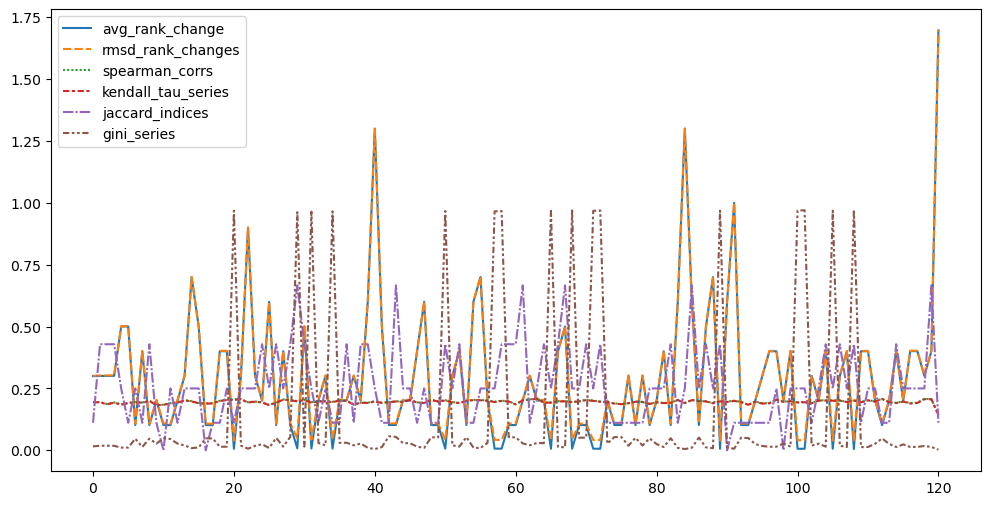

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data = rdf, ax=ax)
plt.show()

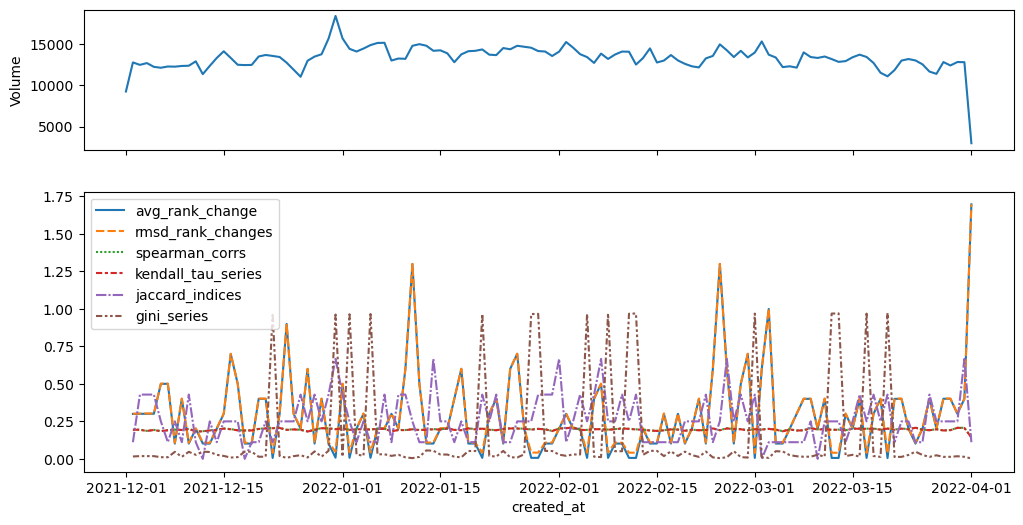

In [45]:
fig, axs = plt.subplots(2, figsize=(12, 6), sharex=True, height_ratios=[1,2])
rdf.index = tpcr.index[1:]
sns.lineplot(data = rdf, ax=axs[1])
sns.lineplot(data = vol_time, ax=axs[0])
ax.tick_params(axis='x', labelrotation=45)
plt.show()

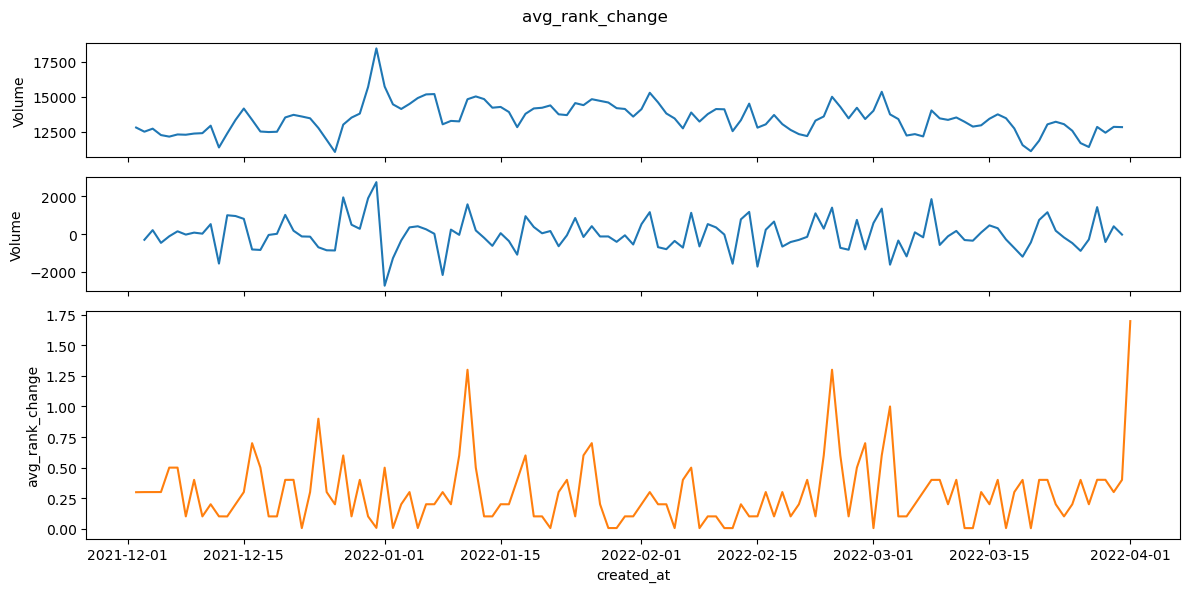

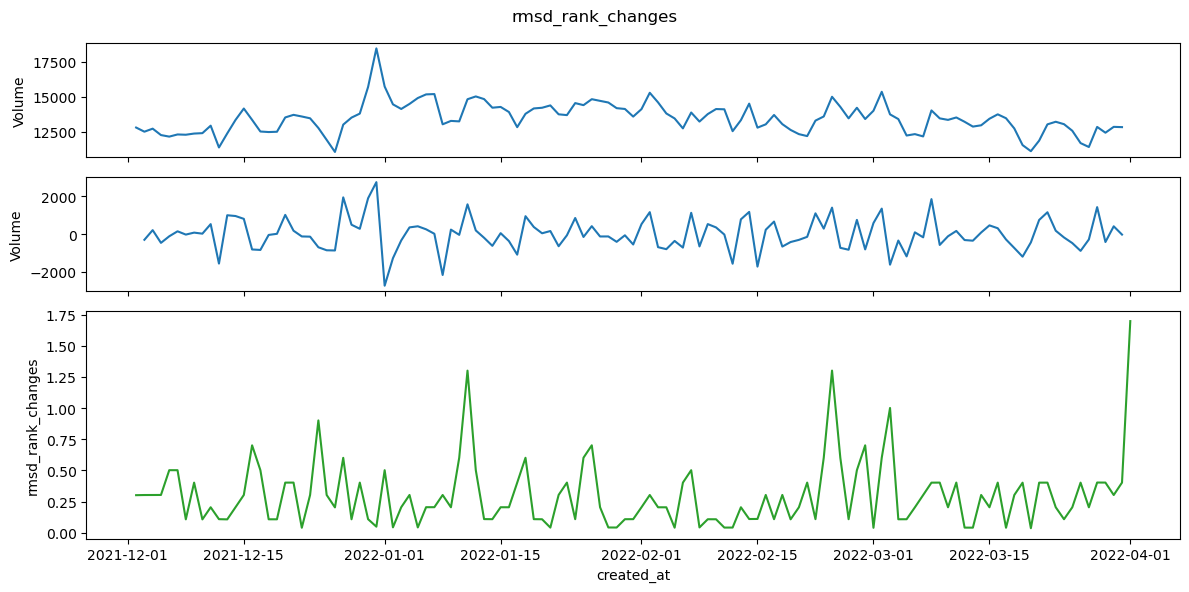

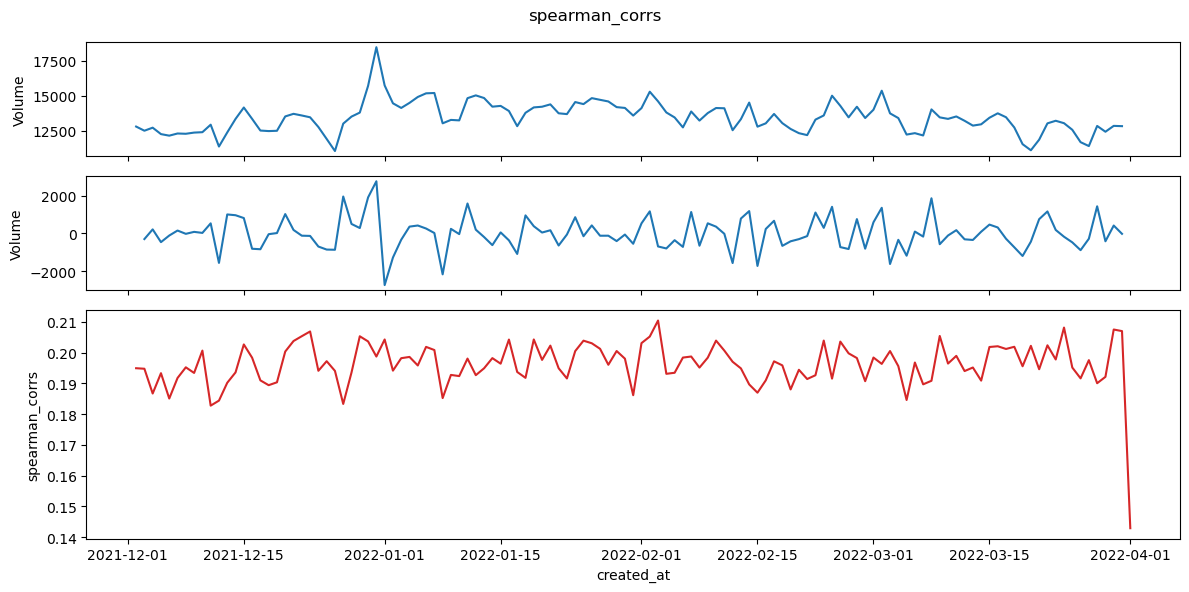

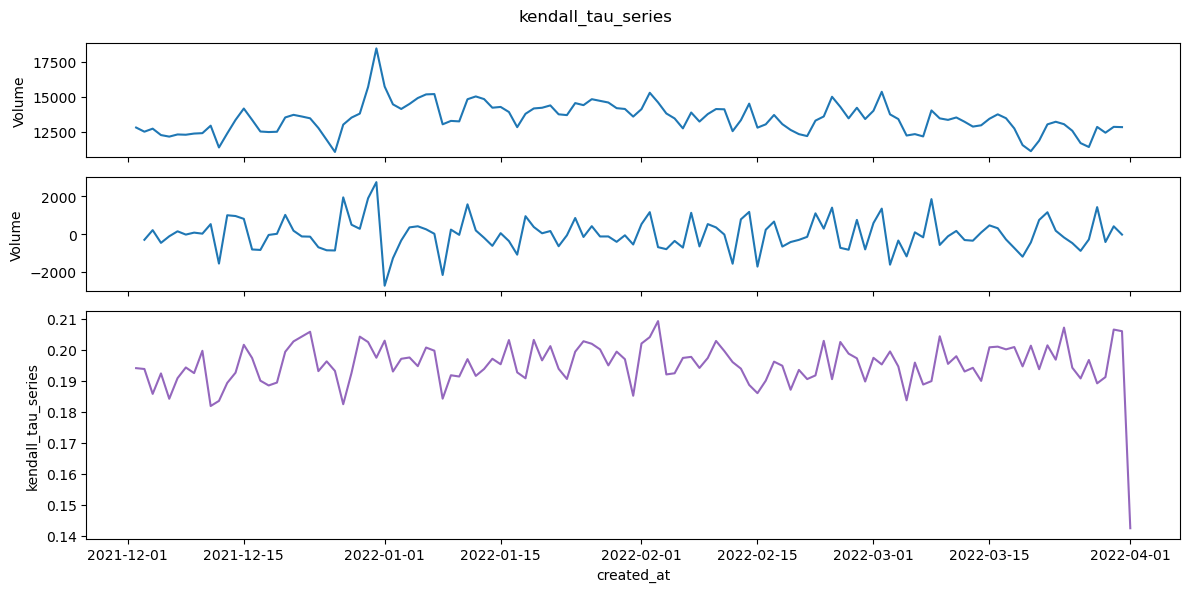

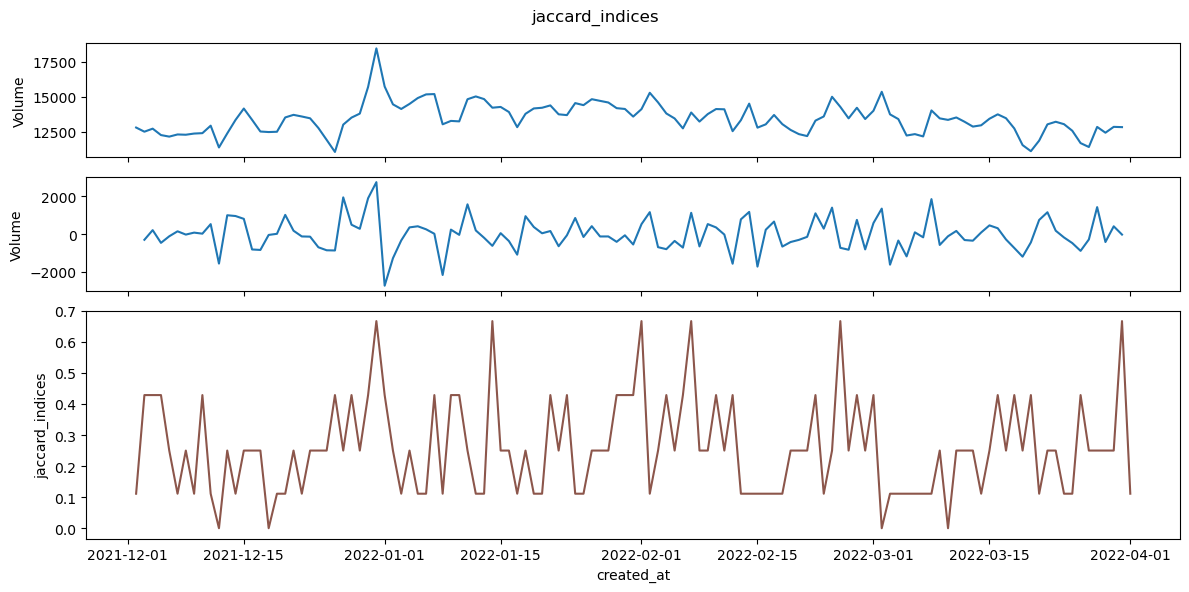

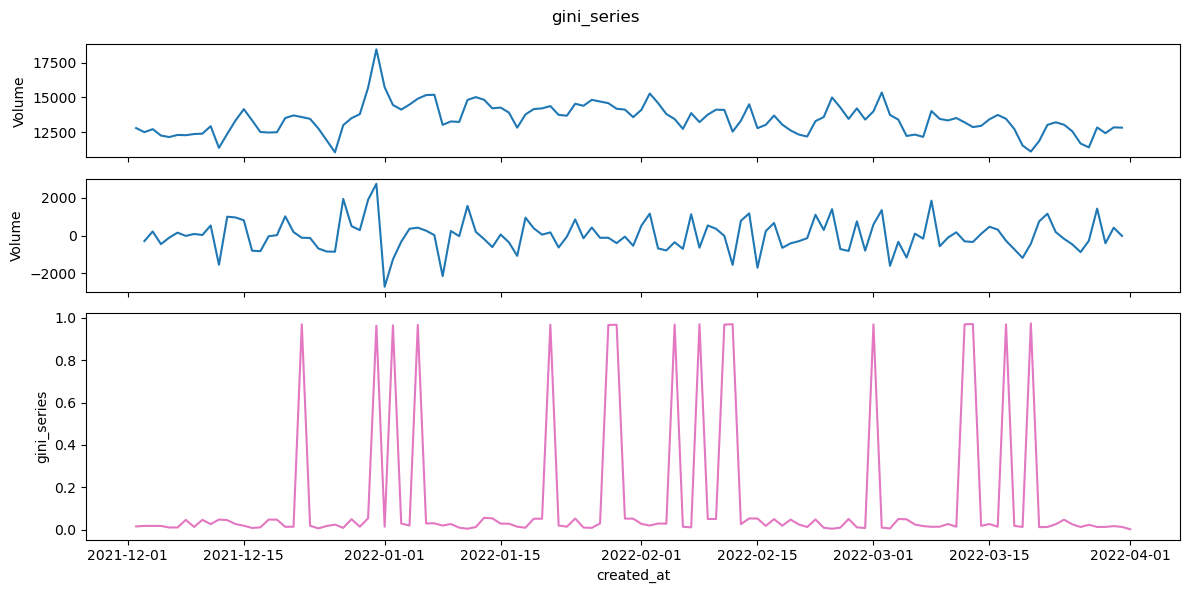

In [46]:
for idx, col in enumerate(rdf.columns):
    fig, axs = plt.subplots(3, figsize=(12, 6), sharex=True, height_ratios=[1,1, 2])
    rdf.index = tpcr.index[1:]
    sns.lineplot(data = vol_time.iloc[1:-1], ax=axs[0])
    sns.lineplot(data = voldiff.iloc[2:-1], ax=axs[1])
    sns.lineplot(data = rdf[col], ax=axs[2], color=sns.color_palette()[idx + 1])
    ax.tick_params(axis='x', labelrotation=45)
    plt.suptitle(f"{col}")
    plt.tight_layout()
    plt.show()

In [48]:
import pandas as pd
import statsmodels.api as sm


In [47]:
rdf.columns

Index(['avg_rank_change', 'rmsd_rank_changes', 'spearman_corrs',
       'kendall_tau_series', 'jaccard_indices', 'gini_series'],
      dtype='object')

In [50]:
# # Sample data
# data = {
#     'y': [y1, y2, y3, ...],  # Replace with your actual time series values
#     'X1': [x1_1, x1_2, x1_3, ...],
#     'X2': [x2_1, x2_2, x2_3, ...]
#     # Add more series if needed
# }


data = {
    'y': vol_time.iloc[1:].values,  # Replace with your actual time series values
    'X1': rdf["avg_rank_change"].values,
    'X2': rdf["rmsd_rank_changes"].values,
    'X3': rdf["spearman_corrs"].values,
    'X4': rdf["kendall_tau_series"].values,
    'X5': rdf["jaccard_indices"].values,
    'X6': rdf["gini_series"].values
    # Add more series if needed
}
df = pd.DataFrame(data)
df

,y,X1,X2,X3,X4,X5,X6
0,12800,0.299491,0.301075,0.194925,0.194137,0.111111,0.015865
1,12504,0.300406,0.302287,0.194756,0.193862,0.428571,0.018249
2,12720,0.300523,0.302486,0.186697,0.185828,0.428571,0.018289
3,12262,0.300744,0.302845,0.193308,0.192430,0.428571,0.018096
4,12152,0.500295,0.501549,0.185067,0.184253,0.250000,0.010968
...,...,...,...,...,...,...,...
116,12844,0.400897,0.402517,0.190049,0.189235,0.250000,0.013272
117,12431,0.400548,0.402071,0.192118,0.191256,0.250000,0.013662
118,12849,0.300446,0.302365,0.207514,0.206589,0.250000,0.017355
119,12829,0.400312,0.401856,0.207000,0.206063,0.666667,0.013513


In [58]:
df.min()

y     2972.000000
X1       0.005175
X2       0.035930
X3       0.142887
X4       0.142471
X5       0.000000
X6       0.002388
dtype: float64

In [59]:
df.max()

y     18455.000000
X1        1.697120
X2        1.697456
X3        0.210436
X4        0.209316
X5        0.666667
X6        0.973263
dtype: float64

In [70]:
from statsmodels.tsa.api import VAR

df_stationary = df

model = VAR(df_stationary)
model_fitted = model.fit(maxlags=5, ic='aic')

In [71]:
print(model_fitted.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Jan, 2024
Time:                     07:44:23
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -38.0770
Nobs:                     119.000    HQIC:                  -39.5334
Log likelihood:           1334.51    FPE:                2.52638e-18
AIC:                     -40.5292    Det(Omega_mle):     1.10051e-18
--------------------------------------------------------------------
Results for equation y
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const     20389.022090      6556.097976            3.110           0.002
L1.y          0.824835         0.288799            2.856           0.004
L1.X1     38786.870863    113278.921850            0.342           0.732
L1.X2    -38964.133821 

In [54]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]  # Independent variables
y = df['y']           # Dependent variable

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Define the model
glm_model = sm.GLM(y, X, family=sm.families.Gaussian())  # Use the appropriate family

In [55]:
result = glm_model.fit()


In [56]:
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  121
Model:                            GLM   Df Residuals:                      114
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                      4.2984e+05
Method:                          IRLS   Log-Likelihood:                -952.84
Date:                Thu, 18 Jan 2024   Deviance:                   4.9002e+07
Time:                        22:13:19   Pearson chi2:                 4.90e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9792
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        323.1066   2156.787      0.150      0.8